# Deep Learning and Uncertainty  

**Authors :**
- Pierrick LEROY 
- Souhail OUMAMA**
- Charles-Elie SIMON  
- Florian TORROBA  

**In this notebook, we will**:
- Learn to perform semantic segmentation with a Deep Neural Network DNN
- See that the DNN's prediction are not reliable
- Try to robustify your DNN's predictions
If you have never used jupyter notebooks, nor Colab notebooks, [here](https://colab.research.google.com/notebooks/welcome.ipynb) is a short intro.


## I. PyTorch Tutorial

We will briefly go through the basics of the PyTorch package, playing with toy examples.

If you already know how to use PyTorch, you can go directly to the second part of this tutorial.

## II. Training a Deep Neural Network for semantic segmentation

In this part, we will train a Deep Neural Network to perform semantic segmentation.

## II. Analyzing the results and working on the uncertainty

In this part, we will test your  Deep Neural Network and see if the results are ok



# I. PyTorch Tutorial
First let us build a start by descovering PyTorch.
Let us start by importing the library.


In [ ]:
import torch
import numpy as np

We are now going to build our first Tensors.
In Pytorch everything is based on tensors, while in Numpy it is base on  arrays. There are similarities, but it is not the same thing!

In [ ]:
# different way to build a tensor
x = torch.empty(5, 3)
print('empty',x)
print(x.size()) # by doing x.size() can see the shape of tensor x
x = torch.rand(5, 3)
print('random',x)
x = torch.zeros(5, 3, dtype=torch.long) # you build a tensor with just zeros
print('zeros',x)
x = torch.tensor([5.5, 3]) # you build a tensor from an list
print('tensor',x)
x = torch.ones(10, 3) # you build a tensor with just ones
print('ones',x)
# override dtype!
x = torch.randn_like(x, dtype=torch.float)
print(x)

empty tensor([[1.5977e-35, 0.0000e+00, 3.3631e-44],
        [0.0000e+00,        nan, 0.0000e+00],
        [1.1578e+27, 1.1362e+30, 7.1547e+22],
        [4.5828e+30, 1.2121e+04, 7.1846e+22],
        [9.2198e-39, 7.0374e+22, 0.0000e+00]])
torch.Size([5, 3])
random tensor([[0.6792, 0.1155, 0.1274],
        [0.8513, 0.3400, 0.2530],
        [0.5982, 0.2670, 0.6117],
        [0.5606, 0.7099, 0.1144],
        [0.6113, 0.6841, 0.3912]])
zeros tensor([[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]])
tensor tensor([5.5000, 3.0000])
ones tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])
tensor([[ 0.0706,  0.7565, -0.1211],
        [ 0.0910, -0.6930, -0.3674],
        [-0.4296, -0.9089, -0.0141],
        [-0.1905,  0.8174,  0.7786],
        [-1.0387, -0.2434, -0.3186],
        [-1.8769, -1.

Now let us play with operations between tensors

In [ ]:
y = torch.rand(5, 3)
x = torch.ones(5, 3)
z=x + y
print(z)

tensor([[1.4596, 1.2304, 1.4050],
        [1.7380, 1.9053, 1.3272],
        [1.8157, 1.3800, 1.9300],
        [1.7286, 1.3086, 1.2174],
        [1.3288, 1.5619, 1.7339]])


In [ ]:
# here is 3 different ways to change the shape of x
print(x)
x0=x.view((3,5))
print('original shape of x',x.size(),'new shape',x0.size())
x1=x.view(-1)
print('original shape of x',x.size(),'new shape',x1.size())

x2=x.transpose(0, 1)
print('original shape of x',x.size(),'new shape',x2.size())

x3=x.reshape((3,5))
print('original shape of x',x.size(),'new shape',x3.size())

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])
original shape of x torch.Size([5, 3]) new shape torch.Size([3, 5])
original shape of x torch.Size([5, 3]) new shape torch.Size([15])
original shape of x torch.Size([5, 3]) new shape torch.Size([3, 5])
original shape of x torch.Size([5, 3]) new shape torch.Size([3, 5])


From Pytorch to Numpy


In [ ]:
x=  torch.randn(4, 4)
print('the type of x is :',type(x))
xnumpy=x.numpy()
print('the type of xnumpy is :',type(xnumpy))

the type of x is : <class 'torch.Tensor'>
the type of xnumpy is : <class 'numpy.ndarray'>


In [ ]:
x2=torch.tensor([1.0])
print('the type of x is :',type(x2))
x2numpy=x2.numpy()
print('the type of xnumpy is :',type(x2numpy))
x2numpy=x2.item()
print('the type of xnumpy is :',type(x2numpy))

the type of x is : <class 'torch.Tensor'>
the type of xnumpy is : <class 'numpy.ndarray'>
the type of xnumpy is : <class 'float'>


**Q1/ why the next command do not work?**



Addition is not supported between Numpy Arrays and Torch Tensors.

In [ ]:

y =xnumpy+x

TypeError: ignored

**Q2/ Please find a way to bring a = np.ones(5) to the GPU?**

This was already implemented.

In [ ]:
# Answer
a=np.ones(5)
print(a)
a=torch.from_numpy(a).cuda()
print(a)

[1. 1. 1. 1. 1.]
tensor([1., 1., 1., 1., 1.], device='cuda:0', dtype=torch.float64)


# II. Training a Deep Neural Network for semantic segmentation

---



---


Now let us perform a semantic segmentation DNN. We will first build a datasetloader and then train the DNN.


In [ ]:
# here are the training parameters
batch_size = 10
learning_rate =1e-3
weight_decay=2e-4
lr_decay_epochs=20
lr_decay=0.1
nb_epochs=50

Please download the [camvid](http://mi.eng.cam.ac.uk/research/projects/VideoRec/CamVid/) dataset and put it in your google cloud  here is the link https://drive.google.com/drive/folders/1HBj97T5aO-NoAEnUy_GfaS1fK5Epf0W2?usp=sharing

## A. building the dataset
Please note that we set as background the car, the bicyclist and pedestrian. So the CNN never see these classes.

In [ ]:
import os

import torch
import torch.nn as nn
import torchvision
import torch.nn.functional as F
import torch.optim as optim
import torch.optim.lr_scheduler as lr_scheduler
import torch.utils.data as data
import torchvision.transforms as transforms
from matplotlib import pyplot as plt
from PIL import Image

from google.colab import drive


In [ ]:
# First you download the camvid dataset from the link (wwwww ) and you put it in your google colab
# Then let us mount you google drive
drive.mount('/drive')


Mounted at /drive


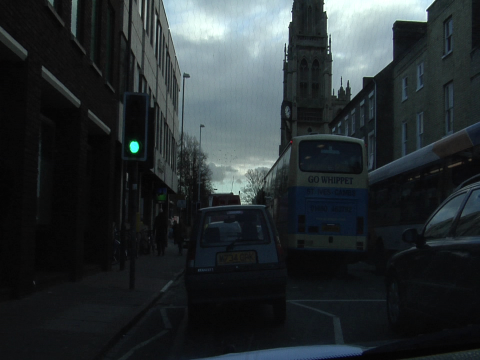

In [ ]:
#
#  Please check that you can read an image  from camvid dataset
PATH_data = '/drive/My Drive/Colab Notebooks/CamVid'

im = Image.open(PATH_data+"/train/0001TP_006690.png")
im

 here is a set of utils function for the dataset and the evaluation

In [ ]:
import os

from collections import OrderedDict
import torch.utils.data as data
import numpy as np
from torchvision.transforms import ToPILImage

def get_files(folder, name_filter=None, extension_filter=None):
    """Helper function that returns the list of files in a specified folder
    with a specified extension.

    Keyword arguments:
    - folder (``string``): The path to a folder.
    - name_filter (```string``, optional): The returned files must contain
    this substring in their filename. Default: None; files are not filtered.
    - extension_filter (``string``, optional): The desired file extension.
    Default: None; files are not filtered

    """
    if not os.path.isdir(folder):
        raise RuntimeError("\"{0}\" is not a folder.".format(folder))

    # Filename filter: if not specified don't filter (condition always true);
    # otherwise, use a lambda expression to filter out files that do not
    # contain "name_filter"
    if name_filter is None:
        # This looks hackish...there is probably a better way
        name_cond = lambda filename: True
    else:
        name_cond = lambda filename: name_filter in filename

    # Extension filter: if not specified don't filter (condition always true);
    # otherwise, use a lambda expression to filter out files whose extension
    # is not "extension_filter"
    if extension_filter is None:
        # This looks hackish...there is probably a better way
        ext_cond = lambda filename: True
    else:
        ext_cond = lambda filename: filename.endswith(extension_filter)

    filtered_files = []

    # Explore the directory tree to get files that contain "name_filter" and
    # with extension "extension_filter"
    for path, _, files in os.walk(folder):
        files.sort()
        for file in files:
            if name_cond(file) and ext_cond(file):
                full_path = os.path.join(path, file)
                filtered_files.append(full_path)

    return filtered_files


def pil_loader(data_path, label_path):
    """Loads a sample and label image given their path as PIL images.

    Keyword arguments:
    - data_path (``string``): The filepath to the image.
    - label_path (``string``): The filepath to the ground-truth image.

    Returns the image and the label as PIL images.

    """
    data = Image.open(data_path)
    label = Image.open(label_path)

    return data, label

def batch_transform(batch, transform):
    """Applies a transform to a batch of samples.

    Keyword arguments:
    - batch (): a batch os samples
    - transform (callable): A function/transform to apply to ``batch``

    """

    # Convert the single channel label to RGB in tensor form
    # 1. torch.unbind removes the 0-dimension of "labels" and returns a tuple of
    # all slices along that dimension
    # 2. the transform is applied to each slice
    transf_slices = [transform(tensor) for tensor in torch.unbind(batch)]

    return torch.stack(transf_slices)

def remap(image, old_values, new_values):
    assert isinstance(image, Image.Image) or isinstance(
        image, np.ndarray), "image must be of type PIL.Image or numpy.ndarray"
    assert type(new_values) is tuple, "new_values must be of type tuple"
    assert type(old_values) is tuple, "old_values must be of type tuple"

    assert len(new_values) == len(
        old_values), "new_values and old_values must have the same length"

    # If image is a PIL.Image convert it to a numpy array
    if isinstance(image, Image.Image):
        image = np.array(image)

    # Replace old values by the new ones
    tmp = np.zeros_like(image)
    for old, new in zip(old_values, new_values):
        # Since tmp is already initialized as zeros we can skip new values
        # equal to 0
        if new != 0:
            tmp[image == old] = new

    return Image.fromarray(tmp)


def enet_weighing(dataloader, num_classes, c=1.02):
    """Computes class weights as described in the ENet paper:

        w_class = 1 / (ln(c + p_class)),

    where c is usually 1.02 and p_class is the propensity score of that
    class:

        propensity_score = freq_class / total_pixels.

    References: https://arxiv.org/abs/1606.02147

    Keyword arguments:
    - dataloader (``data.Dataloader``): A data loader to iterate over the
    dataset.
    - num_classes (``int``): The number of classes.
    - c (``int``, optional): AN additional hyper-parameter which restricts
    the interval of values for the weights. Default: 1.02.

    """

    print(dataloader)
    class_count = 0
    total = 0
    for _, label in dataloader:
      label = label.cpu().numpy()
      # Flatten label
      flat_label = label.flatten()
      
      # Sum up the number of pixels of each class and the total pixel
      # counts for each label
      class_count += np.bincount(flat_label, minlength=num_classes)
      total += flat_label.size

    # Compute propensity score and then the weights for each class
    propensity_score = class_count / total
    class_weights = 1 / (np.log(c + propensity_score))

    return class_weights





class PILToLongTensor(object):
    """Converts a ``PIL Image`` to a ``torch.LongTensor``.
    Code adapted from: http://pytorch.org/docs/master/torchvision/transforms.html?highlight=totensor
    """

    def __call__(self, pic):
        """Performs the conversion from a ``PIL Image`` to a ``torch.LongTensor``.
        Keyword arguments:
        - pic (``PIL.Image``): the image to convert to ``torch.LongTensor``
        Returns:
        A ``torch.LongTensor``.
        """
        if not isinstance(pic, Image.Image):
            raise TypeError("pic should be PIL Image. Got {}".format(
                type(pic)))

        # handle numpy array
        if isinstance(pic, np.ndarray):
            img = torch.from_numpy(pic.transpose((2, 0, 1)))
            # backward compatibility
            return img.long()

        # Convert PIL image to ByteTensor
        img = torch.ByteTensor(torch.ByteStorage.from_buffer(pic.tobytes()))

        # Reshape tensor
        nchannel = len(pic.mode)
        img = img.view(pic.size[1], pic.size[0], nchannel)

        # Convert to long and squeeze the channels
        return img.transpose(0, 1).transpose(0,
                                             2).contiguous().long().squeeze_()


class LongTensorToRGBPIL(object):
    """Converts a ``torch.LongTensor`` to a ``PIL image``.
    The input is a ``torch.LongTensor`` where each pixel's value identifies the
    class.
    Keyword arguments:
    - rgb_encoding (``OrderedDict``): An ``OrderedDict`` that relates pixel
    values, class names, and class colors.
    """
    def __init__(self, rgb_encoding):
        self.rgb_encoding = rgb_encoding

    def __call__(self, tensor):
        """Performs the conversion from ``torch.LongTensor`` to a ``PIL image``
        Keyword arguments:
        - tensor (``torch.LongTensor``): the tensor to convert
        Returns:
        A ``PIL.Image``.
        """
        # Check if label_tensor is a LongTensor
        if not isinstance(tensor, torch.LongTensor):
            raise TypeError("label_tensor should be torch.LongTensor. Got {}"
                            .format(type(tensor)))
        # Check if encoding is a ordered dictionary
        if not isinstance(self.rgb_encoding, OrderedDict):
            raise TypeError("encoding should be an OrderedDict. Got {}".format(
                type(self.rgb_encoding)))

        # label_tensor might be an image without a channel dimension, in this
        # case unsqueeze it
        if len(tensor.size()) == 2:
            tensor.unsqueeze_(0)

        color_tensor = torch.ByteTensor(3, tensor.size(1), tensor.size(2))

        for index, (class_name, color) in enumerate(self.rgb_encoding.items()):
            # Get a mask of elements equal to index
            mask = torch.eq(tensor, index).squeeze_()
            # Fill color_tensor with corresponding colors
            for channel, color_value in enumerate(color):
                color_tensor[channel].masked_fill_(mask, color_value)

        return ToPILImage()(color_tensor)

## B building the Datalaoder

**Q3/ please study the dataset a bit. What it is about?**

Plot images, have a look at the information link to camvid dataset

In [ ]:
class CamVid(data.Dataset):
    """CamVid dataset loader where the dataset is arranged as in
    https://github.com/alexgkendall/SegNet-Tutorial/tree/master/CamVid.


    Keyword arguments:
    - root_dir (``string``): Root directory path.
    - mode (``string``): The type of dataset: 'train' for training set, 'val'
    for validation set, and 'test' for test set.
    - transform (``callable``, optional): A function/transform that  takes in
    an PIL image and returns a transformed version. Default: None.
    - label_transform (``callable``, optional): A function/transform that takes
    in the target and transforms it. Default: None.
    - loader (``callable``, optional): A function to load an image given its
    path. By default ``default_loader`` is used.

    """
    # Training dataset root folders
    train_folder = 'train'
    train_lbl_folder = 'trainannot'

    # Validation dataset root folders
    val_folder = 'val'
    val_lbl_folder = 'valannot'

    # Test dataset root folders
    test_folder = 'test'
    test_lbl_folder = 'testannot'

    # Images extension
    img_extension = '.png'

    # Default encoding for pixel value, class name, and class color
    color_encoding = OrderedDict([
        ('sky', (128, 128, 128)),
        ('building', (128, 0, 0)),
        ('pole', (192, 192, 128)),
        ('road_marking', (255, 69, 0)),
        ('road', (128, 64, 128)),
        ('pavement', (60, 40, 222)),
        ('tree', (128, 128, 0)),
        ('sign_symbol', (192, 128, 128)),
        ('fence', (64, 64, 128)),
        ('car', (64, 0, 128)),
        ('pedestrian', (64, 64, 0)),
        ('bicyclist', (0, 128, 192)),
        ('unlabeled', (0, 0, 0))
    ])

    def __init__(self,
                 root_dir,
                 mode='train',
                 transform=None,
                 label_transform=None,
                 loader=pil_loader):
        self.root_dir = root_dir
        self.mode = mode
        self.transform = transform
        self.label_transform = label_transform
        self.loader = loader

        if self.mode.lower() == 'train':
            # Get the training data and labels filepaths
            self.train_data = get_files(
                os.path.join(root_dir, self.train_folder),
                extension_filter=self.img_extension)

            self.train_labels = get_files(
                os.path.join(root_dir, self.train_lbl_folder),
                extension_filter=self.img_extension)
        elif self.mode.lower() == 'val':
            # Get the validation data and labels filepaths
            self.val_data = get_files(
                os.path.join(root_dir, self.val_folder),
                extension_filter=self.img_extension)

            self.val_labels = get_files(
                os.path.join(root_dir, self.val_lbl_folder),
                extension_filter=self.img_extension)
        elif self.mode.lower() == 'test':
            # Get the test data and labels filepaths
            self.test_data = get_files(
                os.path.join(root_dir, self.test_folder),
                extension_filter=self.img_extension)

            self.test_labels = get_files(
                os.path.join(root_dir, self.test_lbl_folder),
                extension_filter=self.img_extension)
        else:
            raise RuntimeError("Unexpected dataset mode. "
                               "Supported modes are: train, val and test")

    def __getitem__(self, index):
        """
        Args:
        - index (``int``): index of the item in the dataset

        Returns:
        A tuple of ``PIL.Image`` (image, label) where label is the ground-truth
        of the image.

        """
        if self.mode.lower() == 'train':
            data_path, label_path = self.train_data[index], self.train_labels[
                index]
        elif self.mode.lower() == 'val':
            data_path, label_path = self.val_data[index], self.val_labels[
                index]
        elif self.mode.lower() == 'test':
            data_path, label_path = self.test_data[index], self.test_labels[
                index]
        else:
            raise RuntimeError("Unexpected dataset mode. "
                               "Supported modes are: train, val and test")

        img, label = self.loader(data_path, label_path)

        if self.transform is not None:
            img = self.transform(img)

        if self.label_transform is not None:
            label = self.label_transform(label)

        return img, label

    def __len__(self):
        """Returns the length of the dataset."""
        if self.mode.lower() == 'train':
            return len(self.train_data)
        elif self.mode.lower() == 'val':
            return len(self.val_data)
        elif self.mode.lower() == 'test':
            return len(self.test_data)
        else:
            raise RuntimeError("Unexpected dataset mode. "
                               "Supported modes are: train, val and test")



In [ ]:
print("\nLoading dataset...\n")
print("Dataset directory:", PATH_data)
#print("Save directory:", save_dir)

image_transform = transforms.Compose(
        [transforms.Resize((360, 480)),
         transforms.ToTensor()])

label_transform = transforms.Compose([
        transforms.Resize((360, 480), Image.NEAREST),
        PILToLongTensor()
    ])

image_transform_test = transforms.Compose(
        [transforms.Resize((360, 480)),
         transforms.ToTensor()])

# Get selected dataset
# Load the training set as tensors
train_set = CamVid(
        PATH_data,
        transform=image_transform,
        label_transform=label_transform)
train_loader = data.DataLoader(
        train_set,
        batch_size=batch_size,
        shuffle=True,
        num_workers=4)

# Load the validation set as tensors
val_set = CamVid(
        PATH_data,
        mode='val',
        transform=image_transform,
        label_transform=label_transform)
val_loader = data.DataLoader(
        val_set,
        batch_size=batch_size,
        shuffle=False,
        num_workers=4)

# Load the test set as tensors
test_set = CamVid(
        PATH_data,
        mode='test',
        transform=image_transform_test,
        label_transform=label_transform)
test_loader = data.DataLoader(
        test_set,
        batch_size=batch_size,
        shuffle=False,
        num_workers=4)

# Get encoding between pixel valus in label images and RGB colors
class_encoding = train_set.color_encoding
print('class_encoding  >>>>>', class_encoding)
# Remove the road_marking class from the CamVid dataset as it's merged
# with the road class
#del class_encoding['road_marking']

# Get number of classes to predict
num_classes = len(class_encoding)

# Print information for debugging
print("Number of classes to predict:", num_classes)
print("Train dataset size:", len(train_set))
print("Validation dataset size:", len(val_set))

# Get a batch of samples to display

images, labels = iter(test_loader).next()
print("Image size:", images.size())
print("Label size:", labels.size())
print("Class-color encoding:", class_encoding)


# Get class weights from the selected weighing technique
print("\nComputing class weights...")
print("(this can take a while depending on the dataset size)")

class_weights = enet_weighing(train_loader, num_classes)

class_weights = torch.from_numpy(class_weights).float().cuda()
# Set the weight of the unlabeled class to 0

ignore_index = list(class_encoding).index('unlabeled')
class_weights[ignore_index] = 0
ignore_index = list(class_encoding).index('pedestrian')
class_weights[ignore_index] = 0
ignore_index = list(class_encoding).index('bicyclist')
class_weights[ignore_index] = 0
ignore_index = list(class_encoding).index('car')
class_weights[ignore_index] = 0

print("Class weights:", class_weights)


Loading dataset...

Dataset directory: /drive/My Drive/Colab Notebooks/CamVid
class_encoding  >>>>> OrderedDict([('sky', (128, 128, 128)), ('building', (128, 0, 0)), ('pole', (192, 192, 128)), ('road_marking', (255, 69, 0)), ('road', (128, 64, 128)), ('pavement', (60, 40, 222)), ('tree', (128, 128, 0)), ('sign_symbol', (192, 128, 128)), ('fence', (64, 64, 128)), ('car', (64, 0, 128)), ('pedestrian', (64, 64, 0)), ('bicyclist', (0, 128, 192)), ('unlabeled', (0, 0, 0))])
Number of classes to predict: 13
Train dataset size: 367
Validation dataset size: 101


/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:333: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  "Argument interpolation should be of type InterpolationMode instead of int. "
/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Image size: torch.Size([10, 3, 360, 480])
Label size: torch.Size([10, 360, 480])
Class-color encoding: OrderedDict([('sky', (128, 128, 128)), ('building', (128, 0, 0)), ('pole', (192, 192, 128)), ('road_marking', (255, 69, 0)), ('road', (128, 64, 128)), ('pavement', (60, 40, 222)), ('tree', (128, 128, 0)), ('sign_symbol', (192, 128, 128)), ('fence', (64, 64, 128)), ('car', (64, 0, 128)), ('pedestrian', (64, 64, 0)), ('bicyclist', (0, 128, 192)), ('unlabeled', (0, 0, 0))])

Computing class weights...
(this can take a while depending on the dataset size)
Class weights: tensor([ 5.7920,  4.4403, 34.0217,  3.4469, 15.9119,  9.0202, 32.0138, 32.4789,
        13.2071,  0.0000,  0.0000,  0.0000,  0.0000], device='cuda:0')


In [ ]:
example_train_loader = data.DataLoader(
        train_set,
        batch_size=batch_size,
        shuffle=True,
        num_workers=4)

batch = next(iter(example_train_loader))
batch[0].shape

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


torch.Size([10, 3, 360, 480])

Text(0.5, 0.98, 'Sample of images from Camvid with associated ground truth')

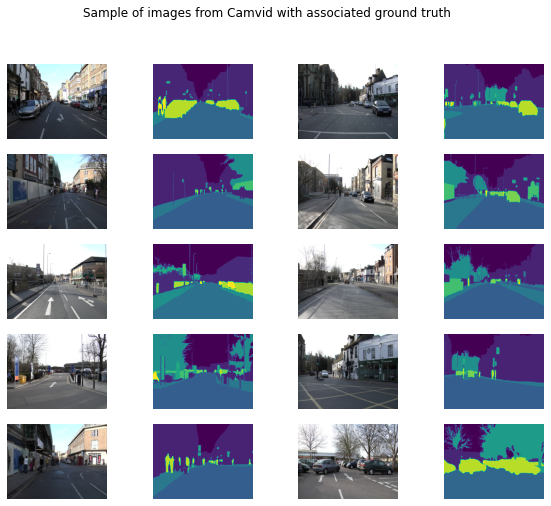

In [ ]:
fig, ax = plt.subplots(5,4)
fig.set_size_inches(10,8)
x, y = batch
for i in range(10):
    ax[i%5,0 + 2 * (i//5)].axis('off')
    ax[i%5,0 + 2 * (i//5)].imshow(ToPILImage()(x[i]))
    ax[i%5,1+ 2 * (i//5)].axis('off')
    ax[i%5,1+ 2 * (i//5)].imshow(ToPILImage()(y[i]/10))
fig.suptitle('Sample of images from Camvid with associated ground truth')

The dataset contains pictures of streets captured from the point of view of a driving car, with the corresponding semantic labels (each pixel of each image is labeled).

We see that images are loaded in batches of 10, each image has 3 channels (RGB) and 360*480 pixels.

**Q4/ why do we need to evaluate the class_weights?**

We assign class_weight to focus more on rare classes during learning phase.
If we didn't use class_weight, a model would try to have the best overall accuracy which could lead to predicting more often a class because the train set is imbalanced. By class weighing we explicitly tell the model to pay less attention to the proportions of classes in the train dataset. We hope this results in an improvement to the prediction quality, especially on rare classes. However it might degrade the overall raw accuracy (pixel per pixel).

**How does it work?**<br>
By assigning a weight to some classes we penalize more the errors on such classes. The gradient's calculation is therefore modified so that the gradient tries to compensate for the overpenalized errors made.

c = 1.01 => range is [100.50,1.43]
c = 1.02 => range is [50.50,1.42]
c = 1.03 => range is [33.83,1.41]
c = 1.1 => range is [10.49,1.35]


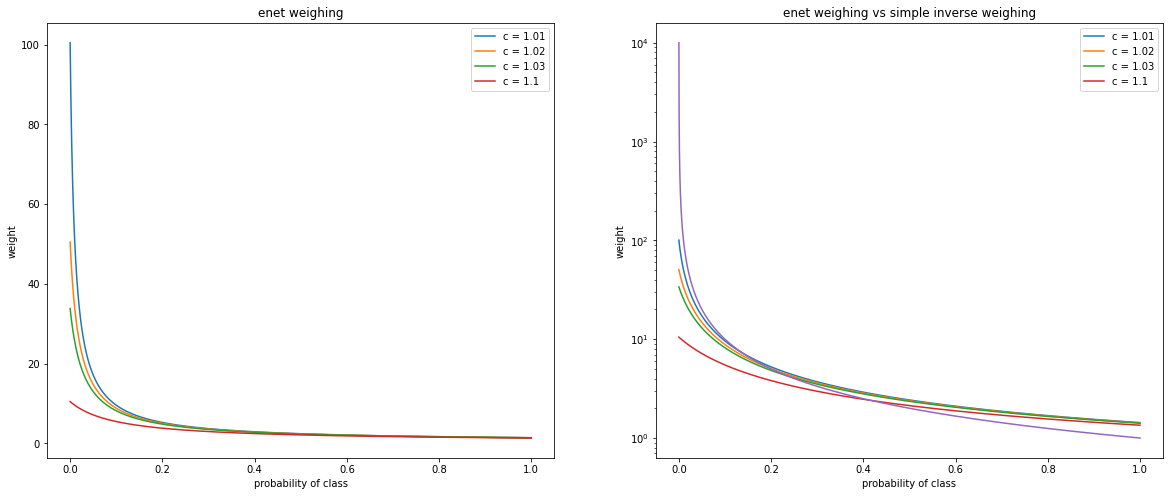

In [ ]:
p_class = np.linspace(0,1,10000)
fig = plt.figure(figsize=(20,8))
def compute_enetWeight(c, p_class):
    return 1/(np.log(c + p_class))

c_list = [1.01, 1.02, 1.03, 1.1]
ax1=fig.add_subplot(1,2,1)
ax2=fig.add_subplot(1,2,2)
for c in c_list:
    w = compute_enetWeight(c, p_class)
    ax1.plot(p_class, w, label="c = "+str(c))
    ax2.plot(p_class, w, label="c = "+str(c))
    print("c = {} => range is [{:.2f},{:.2f}]".format(c, w[0], w[-1]))
ax1.legend()
ax1.set_xlabel("probability of class")
ax1.set_ylabel("weight")
ax1.set_title("enet weighing")

ax2.legend()
ax2.set_xlabel("probability of class")
ax2.set_ylabel("weight")
ax2.set_title("enet weighing vs simple inverse weighing")
ax2.set_yscale('log')
ax2.plot(p_class[1:], 1/p_class[1:], label='simple inverse weigthing')


del c, c_list, p_class

On the graphs, we visualize the influence of the c parameter in the enet weighting method.
On the right, we compare the enet weighting with standard simple inverse weighting (in purple).

## C. building the DNN

**Q5/ Do we really use Unet? What did I change :)? (that is hard)**

**Q6/Why Unet is a bad idea for our task?**

**Q7/Why Did Gianni Choose Unet?**

5) When studying the implemented code, we noticed several differences with available implementations of Unet we found online. They are as follows:

*   We noticed that the original Unet uses a batch size of 1 and high momentum, whereas our implementation uses a batch size of 10 and relies on batch normalization (the original Unet doesn't).
*   Unet uses unpadded convolution (valid) which requires cropping during the expansive path. Our version uses padded convolution, and no cropping.
*   In the double convolution during the expansive path in the original implementation of Unet, the number of channels is first divided by 2 before reaching the final size (ex: to go from x to y channels, the path is x, x/2, y). In our implementation, there are still 3 steps, but in the middle step, the number of channels is equal to the number of channels in the final step of the double convolution (ex: to go from x to y channels, the path is x, y, y).
*   *Note:* The original implementation of Unet uses only transposed convolutions in the expansive path.


6) N/A.

7) Unet is a classic architecture for the task of semantic segmentation. It is fast, and doesn't natively handle uncertainty, which is why we deal with that later in the project.

In [ ]:

__all__ = ["UNet"]


class double_conv(nn.Module):
    '''(conv => BN => ReLU) * 2'''

    def __init__(self, in_ch, out_ch):
        super(double_conv, self).__init__()
        self.conv = nn.Sequential(
            nn.Conv2d(in_ch, out_ch, 3, padding=1),
            nn.BatchNorm2d(out_ch),
            nn.ReLU(inplace=True),
            nn.Conv2d(out_ch, out_ch, 3, padding=1),
            nn.BatchNorm2d(out_ch),
            nn.ReLU(inplace=True)
        )

    def forward(self, x):
        x = self.conv(x)
        return x


class inconv(nn.Module):
    def __init__(self, in_ch, out_ch):
        super(inconv, self).__init__()
        self.conv = double_conv(in_ch, out_ch)

    def forward(self, x):
        x = self.conv(x)
        return x


class down(nn.Module):
    def __init__(self, in_ch, out_ch):
        super(down, self).__init__()
        self.mpconv = nn.Sequential(
            nn.MaxPool2d(2),
            double_conv(in_ch, out_ch)
        )

    def forward(self, x):
        x = self.mpconv(x)
        return x


class up(nn.Module):
    def __init__(self, in_ch, out_ch, bilinear=True):
        super(up, self).__init__()
        self.bilinear = bilinear

        self.up = nn.ConvTranspose2d(in_ch // 2, in_ch // 2, 2, stride=2)

        self.conv = double_conv(in_ch, out_ch)

    def forward(self, x1, x2):
        if self.bilinear:
            x1 = F.interpolate(x1, scale_factor=2, mode='bilinear', align_corners=True)
        else:
            x1 = self.up(x1)

        # input is CHW
        diffY = x2.size()[2] - x1.size()[2]
        diffX = x2.size()[3] - x1.size()[3]

        x1 = F.pad(x1, [diffX // 2, diffX - diffX // 2,
                        diffY // 2, diffY - diffY // 2])

        # for padding issues, see
        # https://github.com/HaiyongJiang/U-Net-Pytorch-Unstructured-Buggy/commit/0e854509c2cea854e247a9c615f175f76fbb2e3a
        # https://github.com/xiaopeng-liao/Pytorch-UNet/commit/8ebac70e633bac59fc22bb5195e513d5832fb3bd

        x = torch.cat([x2, x1], dim=1)
        x = self.conv(x)
        return x


class outconv(nn.Module):
    def __init__(self, in_ch, out_ch):
        super(outconv, self).__init__()
        self.conv = nn.Conv2d(in_ch, out_ch, 1)

    def forward(self, x):
        x = self.conv(x)
        return x

#please note that we have added dropout layer to be abble to use MC dropout

class UNet(nn.Module):
    def __init__(self, classes):
        super(UNet, self).__init__()
        self.inc = inconv(3, 32)
        self.down1 = down(32, 64)
        self.down2 = down(64, 128)
        self.down3 = down(128, 256)
        self.down4 = down(256, 256)
        self.up1 = up(512, 128)
        self.up2 = up(256, 64)
        self.up3 = up(128, 32)
        self.up4 = up(64, 32)
        self.outc = outconv(32, classes)

    def forward(self, x):
        x1 = self.inc(x)
        x2 = self.down1(x1)
        x3 = self.down2(x2)
        x4 = self.down3(x3)
        x5 = self.down4(x4)
        x = self.up1(x5, x4)
        x = F.dropout2d(x, 0.1, training=self.training)
        x = self.up2(x, x3)
        x = F.dropout2d(x, 0.1, training=self.training)
        x = self.up3(x, x2)
        x = F.dropout2d(x, 0.1, training=self.training)
        x = self.up4(x, x1)
        x = F.dropout2d(x, 0.1, training=self.training)
        x = self.outc(x)

        return x

## D. Utility functions

### Metrics

In [ ]:
class Metric(object):
    """Base class for all metrics.
    From: https://github.com/pytorch/tnt/blob/master/torchnet/meter/meter.py
    """
    def reset(self):
        pass

    def add(self):
        pass

    def value(self):
        pass

class ConfusionMatrix(Metric):
    """Constructs a confusion matrix for a multi-class classification problems.
    Does not support multi-label, multi-class problems.
    Keyword arguments:
    - num_classes (int): number of classes in the classification problem.
    - normalized (boolean, optional): Determines whether or not the confusion
    matrix is normalized or not. Default: False.
    Modified from: https://github.com/pytorch/tnt/blob/master/torchnet/meter/confusionmeter.py
    """

    def __init__(self, num_classes, normalized=False):
        super().__init__()

        self.conf = np.ndarray((num_classes, num_classes), dtype=np.int32)
        self.normalized = normalized
        self.num_classes = num_classes
        self.reset()

    def reset(self):
        self.conf.fill(0)

    def add(self, predicted, target):
        """Computes the confusion matrix
        The shape of the confusion matrix is K x K, where K is the number
        of classes.
        Keyword arguments:
        - predicted (Tensor or numpy.ndarray): Can be an N x K tensor/array of
        predicted scores obtained from the model for N examples and K classes,
        or an N-tensor/array of integer values between 0 and K-1.
        - target (Tensor or numpy.ndarray): Can be an N x K tensor/array of
        ground-truth classes for N examples and K classes, or an N-tensor/array
        of integer values between 0 and K-1.
        """
        # If target and/or predicted are tensors, convert them to numpy arrays
        if torch.is_tensor(predicted):
            predicted = predicted.cpu().numpy()
        if torch.is_tensor(target):
            target = target.cpu().numpy()

        assert predicted.shape[0] == target.shape[0], \
            'number of targets and predicted outputs do not match'

        if np.ndim(predicted) != 1:
            assert predicted.shape[1] == self.num_classes, \
                'number of predictions does not match size of confusion matrix'
            predicted = np.argmax(predicted, 1)
        else:
            assert (predicted.max() < self.num_classes) and (predicted.min() >= 0), \
                'predicted values are not between 0 and k-1'

        if np.ndim(target) != 1:
            assert target.shape[1] == self.num_classes, \
                'Onehot target does not match size of confusion matrix'
            assert (target >= 0).all() and (target <= 1).all(), \
                'in one-hot encoding, target values should be 0 or 1'
            assert (target.sum(1) == 1).all(), \
                'multi-label setting is not supported'
            target = np.argmax(target, 1)
        else:
            assert (target.max() < self.num_classes) and (target.min() >= 0), \
                'target values are not between 0 and k-1'

        # hack for bincounting 2 arrays together
        x = predicted + self.num_classes * target
        bincount_2d = np.bincount(
            x.astype(np.int32), minlength=self.num_classes**2)
        assert bincount_2d.size == self.num_classes**2
        conf = bincount_2d.reshape((self.num_classes, self.num_classes))

        self.conf += conf

    def value(self):
        """
        Returns:
            Confustion matrix of K rows and K columns, where rows corresponds
            to ground-truth targets and columns corresponds to predicted
            targets.
        """
        if self.normalized:
            conf = self.conf.astype(np.float32)
            return conf / conf.sum(1).clip(min=1e-12)[:, None]
        else:
            return self.conf



class IoU(Metric):
    """Computes the intersection over union (IoU) per class and corresponding
    mean (mIoU).
    Intersection over union (IoU) is a common evaluation metric for semantic
    segmentation. The predictions are first accumulated in a confusion matrix
    and the IoU is computed from it as follows:
        IoU = true_positive / (true_positive + false_positive + false_negative).
    Keyword arguments:
    - num_classes (int): number of classes in the classification problem
    - normalized (boolean, optional): Determines whether or not the confusion
    matrix is normalized or not. Default: False.
    - ignore_index (int or iterable, optional): Index of the classes to ignore
    when computing the IoU. Can be an int, or any iterable of ints.
    """

    def __init__(self, num_classes, normalized=False, ignore_index=None):
        super().__init__()
        self.conf_metric = ConfusionMatrix(num_classes, normalized)

        if ignore_index is None:
            self.ignore_index = None
        elif isinstance(ignore_index, int):
            self.ignore_index = (ignore_index,)
        else:
            try:
                self.ignore_index = tuple(ignore_index)
            except TypeError:
                raise ValueError("'ignore_index' must be an int or iterable")

    def reset(self):
        self.conf_metric.reset()

    def add(self, predicted, target):
        """Adds the predicted and target pair to the IoU metric.
        Keyword arguments:
        - predicted (Tensor): Can be a (N, K, H, W) tensor of
        predicted scores obtained from the model for N examples and K classes,
        or (N, H, W) tensor of integer values between 0 and K-1.
        - target (Tensor): Can be a (N, K, H, W) tensor of
        target scores for N examples and K classes, or (N, H, W) tensor of
        integer values between 0 and K-1.
        """
        # Dimensions check
        assert predicted.size(0) == target.size(0), \
            'number of targets and predicted outputs do not match'
        assert predicted.dim() == 3 or predicted.dim() == 4, \
            "predictions must be of dimension (N, H, W) or (N, K, H, W)"
        assert target.dim() == 3 or target.dim() == 4, \
            "targets must be of dimension (N, H, W) or (N, K, H, W)"

        # If the tensor is in categorical format convert it to integer format
        if predicted.dim() == 4:
            _, predicted = predicted.max(1)
        if target.dim() == 4:
            _, target = target.max(1)

        self.conf_metric.add(predicted.view(-1), target.view(-1))

    def value(self):
        """Computes the IoU and mean IoU.
        The mean computation ignores NaN elements of the IoU array.
        Returns:
            Tuple: (IoU, mIoU). The first output is the per class IoU,
            for K classes it's numpy.ndarray with K elements. The second output,
            is the mean IoU.
        """
        conf_matrix = self.conf_metric.value()
        if self.ignore_index is not None:
            for index in self.ignore_index:
                conf_matrix[:, self.ignore_index] = 0
                conf_matrix[self.ignore_index, :] = 0
        true_positive = np.diag(conf_matrix)
        false_positive = np.sum(conf_matrix, 0) - true_positive
        false_negative = np.sum(conf_matrix, 1) - true_positive

        # Just in case we get a division by 0, ignore/hide the error
        with np.errstate(divide='ignore', invalid='ignore'):
            iou = true_positive / (true_positive + false_positive + false_negative)

        return iou, np.nanmean(iou)

In [ ]:
# Colors from Colorbrewer Paired_12
colors = [[31, 120, 180], [51, 160, 44]]
colors = [(r / 255, g / 255, b / 255) for (r, g, b) in colors]

def plot_losses(train_history, val_history):
    x = np.arange(1, len(train_history) + 1)

    plt.figure(figsize=(8, 6))
    plt.plot(x, train_history, color=colors[0], label="Training loss", linewidth=2)
    plt.plot(x, val_history, color=colors[1], label="Validation loss", linewidth=2)
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(loc='upper right')
    plt.title("Evolution of the training and validation loss")
    plt.show()

def plot_accu(train_history, val_history):
    x = np.arange(1, len(train_history) + 1)

    plt.figure(figsize=(8, 6))
    plt.plot(x, train_history, color=colors[0], label="Training miou", linewidth=2)
    plt.plot(x, val_history, color=colors[1], label="Validation miou", linewidth=2)
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(loc='upper right')
    plt.title("Evolution of the training and validation loss")
    plt.show()

**Q8/  what is the IoU?**

Overall accuracy is not a good metric for semantic segmentation, especially with class imbalance. Inaccuracy of minority classes is largely overshadowed by the accuracy of majority classes. IoU (Intersection over Union) is richer as a metric than pure accuracy. 

It allows to compare 2 sub spaces and see how similar they are (it is used for the task of tracking with bounding boxes as well). In our case, given a class, the two sub spaces are the pixels for which the ground truth was the considered class, and the pixels for which our network predicted the same mentioned class.

This is what the following formula translates: `IoU =  TP / (TP + FP + FN)` (Provided code)

### Training function

In [ ]:
def train( model, data_loader, optim, criterion, metric,iteration_loss=False):
    model.train()
    epoch_loss = 0.0
    metric.reset()
    for step, batch_data in enumerate(data_loader):
        # Get the inputs and labels
        inputs = batch_data[0].cuda()
        labels = batch_data[1].cuda()

        # Forward propagation
        outputs = model(inputs)

        # Loss computation
        loss = criterion(outputs, labels)

        # Backpropagation
        optim.zero_grad()
        loss.backward()
        optim.step()

        # Keep track of loss for current epoch
        epoch_loss += loss.item()

        # Keep track of the evaluation metric
        metric.add(outputs.detach(), labels.detach())

        if iteration_loss:
            print("[Step: %d] Iteration loss: %.4f" % (step, loss.item()))

    return epoch_loss / len(data_loader), metric.value()

### Validation function

In [ ]:
def test(model, data_loader, criterion, metric, iteration_loss=False):
    model.eval()
    epoch_loss = 0.0
    metric.reset()
    for step, batch_data in enumerate(data_loader):
        # Get the inputs and labels
        inputs = batch_data[0].cuda()
        labels = batch_data[1].cuda()

        with torch.no_grad():
            # Forward propagation
            outputs = model(inputs)

            # Loss computation
            loss = criterion(outputs, labels)

        # Keep track of loss for current epoch
        epoch_loss += loss.item()

        # Keep track of evaluation the metric
        metric.add(outputs.detach(), labels.detach())

        if iteration_loss:
            print("[Step: %d] Iteration loss: %.4f" % (step, loss.item()))

    return epoch_loss / len(data_loader), metric.value()

## E. Training Process

**Q9/ please train your DNN and comment?**

In [ ]:
print("\nTraining...\n")
num_classes = len(class_encoding)
# Intialize UNet
model = UNet(num_classes).cuda()


# We are going to use the CrossEntropyLoss loss function as it's most
# frequentely used in classification problems with multiple classes which
# fits the problem. This criterion  combines LogSoftMax and NLLLoss.
criterion = nn.CrossEntropyLoss(weight=class_weights)

# We build the optimizer
optimizer = optim.Adam(
        model.parameters(),
        lr=learning_rate,
        weight_decay=weight_decay)

# Learning rate decay scheduler
lr_updater = lr_scheduler.StepLR(optimizer, lr_decay_epochs,
                                     lr_decay)

# Evaluation metric
ignore_index=[]
ignore_index0 = list(class_encoding).index('unlabeled')
ignore_index.append(ignore_index0)
ignore_index0 = list(class_encoding).index('pedestrian')
ignore_index.append(ignore_index0)
ignore_index0 = list(class_encoding).index('bicyclist')
ignore_index.append(ignore_index0)
ignore_index0 = list(class_encoding).index('car')
ignore_index.append(ignore_index0)

metric = IoU(num_classes, ignore_index=ignore_index)

# Start Training
best_miou = 0
train_loss_history = []
val_loss_history = []
train_miou_history = []
val_miou_history = []
for epoch in range( nb_epochs):
  print(">>>> [Epoch: {0:d}] Training".format(epoch))
  
  epoch_loss, (iou, miou) = train( model, train_loader, optimizer, criterion, metric) 
  lr_updater.step()
  print(">>>> [Epoch: {0:d}] Avg. loss: {1:.4f} | Mean IoU: {2:.4f}".format(epoch, epoch_loss, miou))
  train_miou=miou
  train_loss=epoch_loss
  if (epoch + 1) % 5 == 0 or epoch + 1 == nb_epochs:

    print(">>>> [Epoch: {0:d}] Validation".format(epoch))
    loss, (iou, miou) = test(model, val_loader, criterion, metric)
    print(">>>> [Epoch: {0:d}] Avg. loss: {1:.4f} | Mean IoU: {2:.4f}".format(epoch, loss, miou))
    train_loss_history.append(train_loss)
    val_loss_history.append(loss)
    train_miou_history.append(train_miou)
    val_miou_history.append(miou)
    # Print per class IoU on last epoch or if best iou
    if epoch + 1 == nb_epochs or miou > best_miou:
      for key, class_iou in zip(class_encoding.keys(), iou):
        print("{0}: {1:.4f}".format(key, class_iou))
        # Save the model if it's the best thus far
        '''if miou > best_miou:
          print("\nBest model thus far. Saving...\n")
          best_miou = miou
          utils.save_checkpoint(model, optimizer, epoch + 1, best_miou,
                                      args)'''


Training...

>>>> [Epoch: 0] Training


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


>>>> [Epoch: 0] Avg. loss: 1.8337 | Mean IoU: 0.2871
>>>> [Epoch: 1] Training
>>>> [Epoch: 1] Avg. loss: 1.3339 | Mean IoU: 0.3685
>>>> [Epoch: 2] Training
>>>> [Epoch: 2] Avg. loss: 1.0777 | Mean IoU: 0.4314
>>>> [Epoch: 3] Training
>>>> [Epoch: 3] Avg. loss: 0.9159 | Mean IoU: 0.4785
>>>> [Epoch: 4] Training
>>>> [Epoch: 4] Avg. loss: 0.8280 | Mean IoU: 0.4978
>>>> [Epoch: 4] Validation
>>>> [Epoch: 4] Avg. loss: 0.7853 | Mean IoU: 0.4812
sky: 0.9008
building: 0.4859
pole: 0.0374
road_marking: 0.9185
road: 0.5949
pavement: 0.6868
tree: 0.1466
sign_symbol: 0.3654
fence: 0.1943
car: nan
pedestrian: nan
bicyclist: nan
unlabeled: nan
>>>> [Epoch: 5] Training
>>>> [Epoch: 5] Avg. loss: 0.7514 | Mean IoU: 0.5200
>>>> [Epoch: 6] Training
>>>> [Epoch: 6] Avg. loss: 0.7260 | Mean IoU: 0.5194
>>>> [Epoch: 7] Training
>>>> [Epoch: 7] Avg. loss: 0.6659 | Mean IoU: 0.5425
>>>> [Epoch: 8] Training
>>>> [Epoch: 8] Avg. loss: 0.6131 | Mean IoU: 0.5606
>>>> [Epoch: 9] Training
>>>> [Epoch: 9] Avg. lo

We notice that we obtain good IoU metric on multiple labels such as: sky, building or road. However, the performance drops when considering more detailed objects such as trees, sign_symbol and especially poles (that are quite thin).

We can deduce that pixels related to the ignored labels were most likely classified with the aforementioned labels thus the performance drop.

# III. Evalution of the Trained DNN on the test

## A. classical evaluations

**Q10/ please plot the loss and miou and comment about it ?**

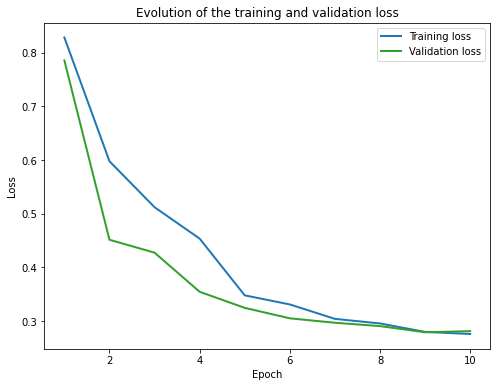

In [ ]:
plot_losses(train_loss_history, val_loss_history)

We optimize on the loss, and see that the training loss decreases consistently epoch after epoch which is what is expected. The validation loss follows this trend. We do not notice any major increase in the validation loss, which does not suggest overfitting.

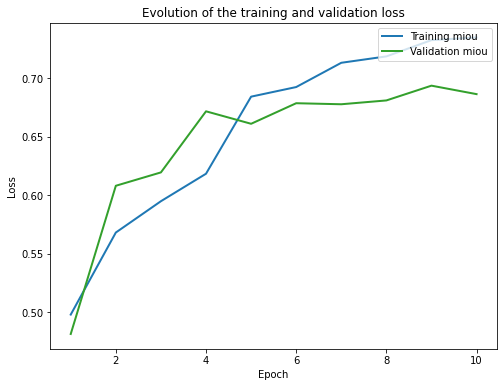

In [ ]:
plot_accu(train_miou_history, val_miou_history)

Studying the miou gives a slightly different perspective. Both the training and validation miou increase epoch after epoch towards 1, which is the best value.

However, we notice that the validation miou seems to stabilize (i.e. reaching some kind of plateau) after 6 epochs, whereas the training miou keeps increasing more steadily. This suggests overfitting.

**Q11/ what should we have done to avoid overfitting?**

**please describe the curbs**


In [ ]:
# Now we evaluate the model on all the test set.
loss, (iou, miou) = test(model, test_loader, criterion, metric)
print(">>>> [FINAL TEST on the test set: ] Avg. loss: ", loss ," | Mean IoU: ", miou)
# Print per class IoU on last epoch or if best iou
for key, class_iou in zip(class_encoding.keys(), iou):
  print("{0}: {1:.4f}".format(key, class_iou))

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


>>>> [FINAL TEST on the test set: ] Avg. loss:  0.6170815750956535  | Mean IoU:  0.5873391080653598
sky: 0.9148
building: 0.6717
pole: 0.2110
road_marking: 0.9022
road: 0.7093
pavement: 0.6996
tree: 0.1952
sign_symbol: 0.2468
fence: 0.7355
car: nan
pedestrian: nan
bicyclist: nan
unlabeled: nan


To avoid overfitting, we could have:
*   Used early stopping, as proposed in the code (but was commented at the time of execution).
*   Used carefully chosen data augmentation, such as vertical flipping, brightness modifications, slight rotations, slight zooming... (the data augmentation should not usher in changes in labels).

## B. Uncertainty evaluations with MCP
Here you will just use as confidence score the Maximum class probability (MCP)


In [ ]:
m = torch.nn.Softmax2d()
batch_images, batch_labels = iter(test_loader).next()
batch_images = batch_images.cuda()
batch_labels = batch_labels.cuda()
model.eval()
with torch.no_grad():
  # Forward propagation
  outputs = model(batch_images)
  outputs0=outputs[:,0:7,:,:] # we delete the last class since we do not train on that
  outputs0_proba = m(outputs0)
  confidence, pred = outputs0_proba.max(1)



/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


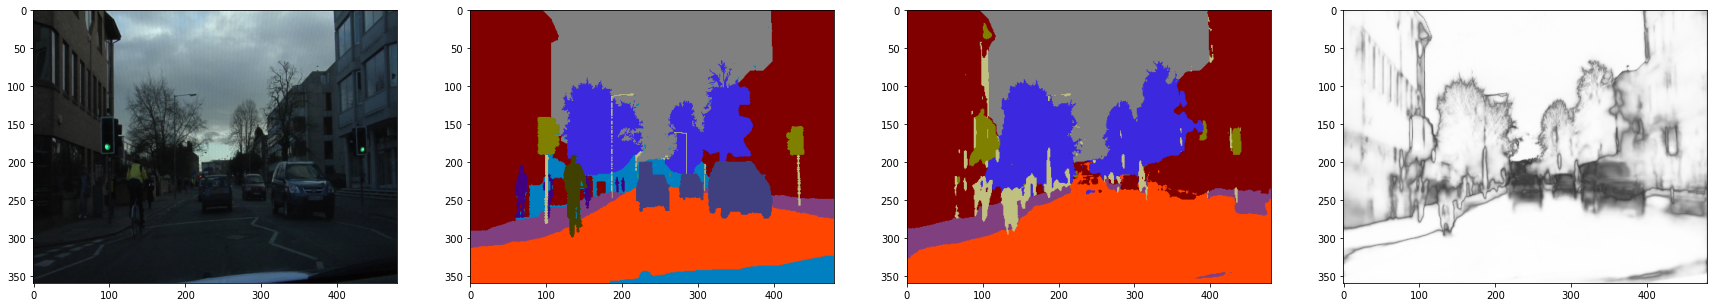

In [ ]:
img_id=0
label_to_rgb = transforms.Compose([
        LongTensorToRGBPIL(class_encoding),
        transforms.ToTensor()])
color_predictions = batch_transform(pred.cpu(), label_to_rgb)
color_batch_labels = batch_transform(batch_labels.cpu(), label_to_rgb)
image = torchvision.utils.make_grid(batch_images[img_id].cpu()).numpy()
label = torchvision.utils.make_grid(color_batch_labels[img_id]).numpy()
predictionimg = torchvision.utils.make_grid(color_predictions[img_id]).numpy()
confidenceimg = torchvision.utils.make_grid(confidence[img_id].cpu()).numpy()

fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(30, 15))
ax1.imshow(np.transpose(image, (1, 2, 0)))
ax2.imshow(np.transpose(label, (1, 2, 0)))
ax3.imshow(np.transpose(predictionimg, (1, 2, 0)))
ax4.imshow(np.transpose(confidenceimg, (1, 2, 0)))
plt.show()


**Q12/ The last image is the related to the confidence score of the DNN. Can you explain why?**
**Are you happy with this image?**

What is displayed in the last picture are the maximum probabilities for each pixel of the original image. We use these probabilities to quantify the uncertainty of our network, meaning that we use the probability for a given pixel to interpret wether the network was confident in its decision or not for that pixel. The more a pixel tends to black, the lower the probability (and thus the confidence). On the opposite, the more a pixel tends to white, the higher the probabilty (and same for the confidence).


The NeuralNet has classified pixels of labels we have removed as classes it has already seen. This results in uncertainty at some points, but not everywhere.
In other terms, the NN classifies “Cars” as “Buildings”, but is not very confident of its predictions, which is exactly what we want, but on the other hand classifies “pedestrians” and “cyclists” as “pole” and “building” but is pretty confident of its predictions, which is dangerous for an autonomous car.

We can also notice that the last picture (which displays the maximum probabilities) suggests that edges are regions that are particularly uncertain, which makes sense, because they tend to be at the border between two classes.


## C. Uncertainty evaluations with Temperature Scaling
**Q13/ please implement a temperature scaling**

In [ ]:
def T_scaling(logits, args):
    """returning the calibrated confidences given a specific temperature T together with the logits.
    Keyword arguments:
    - logits (Tensor): Outputs of the model before passing to the Softmax. 
    - args (Float): Temperature of the scaling. Must be > 0 
    """
    temperature = args.get('temperature', None)
    return torch.div(logits, temperature)

In [ ]:
# Use the GPU provided by Google Colab
device = 'cuda:0'

In [ ]:
temperature = nn.Parameter(torch.ones(1).cuda())
args = {'temperature': temperature}
criterion = nn.CrossEntropyLoss()
optimizer = optim.LBFGS([temperature], lr=0.001, max_iter=10000, line_search_fn='strong_wolfe')

logits_list = []
labels_list = []
temps = []
losses = []

for step, batch_data in enumerate(val_loader):
    # Get the inputs and labels
    images = batch_data[0].cuda()
    labels = batch_data[1].cuda()

    model.eval()
    with torch.no_grad():
      logits_list.append(model(images))
      labels_list.append(labels)

# Create tensors
logits_list = torch.cat(logits_list).to(device)
labels_list = torch.cat(labels_list).to(device)

def _eval():
  loss = criterion(T_scaling(logits_list, args), labels_list)
  loss.backward()
  temps.append(temperature.item())
  losses.append(loss)
  return loss

optimizer.step(_eval)


print('Final T_scaling factor: {:.2f}'.format(temperature.item()))

plt.subplot(121)
plt.plot(list(range(len(temps))), temps)
plt.title('Temperature')

losses = [loss.cpu().detach().numpy() for loss in losses]
plt.subplot(122)
plt.plot(list(range(len(losses))), losses)
plt.title('Loss')
plt.show()

In [ ]:
Temp = temperature.cpu().detach().item()
#Temp = 5
m = torch.nn.Softmax2d()
batch_images, batch_labels = iter(test_loader).next()
batch_images = batch_images.cuda()
batch_labels = batch_labels.cuda()
model.eval()
with torch.no_grad():
  # Forward propagation
  outputs = model(batch_images)
  outputs0=outputs[:,0:7,:,:] # we delete the last class since we do not train on that
  outputs0_proba_mc = m(outputs0/Temp)
  confidence_mc, pred_mc = outputs0_proba_mc.max(1)

In [ ]:
img_id=0
label_to_rgb = transforms.Compose([
        LongTensorToRGBPIL(class_encoding),
        transforms.ToTensor()])
color_predictions_mc = batch_transform(pred_mc.cpu(), label_to_rgb)
color_batch_labels = batch_transform(batch_labels.cpu(), label_to_rgb)
image = torchvision.utils.make_grid(batch_images[img_id].cpu()).numpy()
label = torchvision.utils.make_grid(color_batch_labels[img_id]).numpy()
predictionimg_mc = torchvision.utils.make_grid(color_predictions_mc[img_id]).numpy()
confidenceimg_mc = torchvision.utils.make_grid(confidence_mc[img_id].cpu()).numpy()

fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(30, 15))
ax1.imshow(np.transpose(image, (1, 2, 0)))
ax2.imshow(np.transpose(label, (1, 2, 0)))
ax3.imshow(np.transpose(predictionimg, (1, 2, 0)))
ax4.imshow(np.transpose(confidenceimg, (1, 2, 0)))
plt.show()

fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(30, 15))
ax1.imshow(np.transpose(image, (1, 2, 0)))
ax2.imshow(np.transpose(label, (1, 2, 0)))
ax3.imshow(np.transpose(predictionimg_mc, (1, 2, 0)))
ax4.imshow(np.transpose(confidenceimg_mc, (1, 2, 0)))
plt.show()

## D. Uncertainty evaluations with MC Dropout

Let us implement **MC dropout**. This technique decribed in [this paper](https://arxiv.org/abs/1506.02142) allow us to have a better confindence score by using the dropout during test time.



**Q\14 Please implement MC Dropout.**

In [ ]:
repeat_dropout=100
model.train()
with torch.no_grad():
    outputs_proba = torch.zeros((10, 7, 360, 480)).cuda()
    for i in range(repeat_dropout):
        if i % 50 == 0: print(f'round {i}')
        outputs = model(batch_images)
        outputs0 = outputs[:,0:7,:,:] # we delete the last class since we do not train on that
        outputs_proba += m(outputs0)

    outputs_proba /= repeat_dropout
    confidence, pred = outputs_proba.max(1)

round 0
round 50


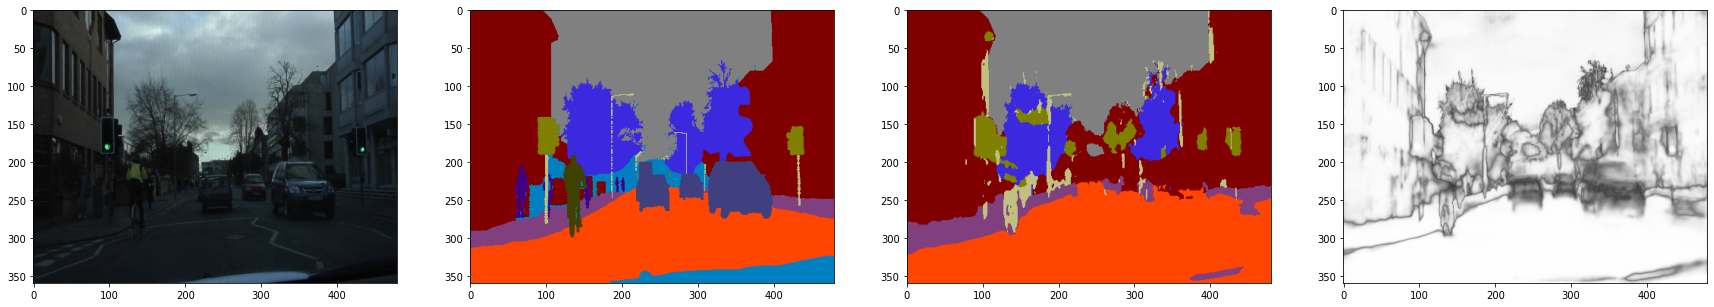

In [ ]:
img_id=0
label_to_rgb = transforms.Compose([
        LongTensorToRGBPIL(class_encoding),
        transforms.ToTensor()])
color_predictions = batch_transform(pred.cpu(), label_to_rgb)
color_batch_labels = batch_transform(batch_labels.cpu(), label_to_rgb)
image = torchvision.utils.make_grid(batch_images[img_id].cpu()).numpy()
label = torchvision.utils.make_grid(color_batch_labels[img_id]).numpy()
predictionimg = torchvision.utils.make_grid(color_predictions[img_id]).numpy()
confidenceimg = torchvision.utils.make_grid(confidence[img_id].cpu()).numpy()
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(30, 15))
ax1.imshow(np.transpose(image, (1, 2, 0)))
ax2.imshow(np.transpose(label, (1, 2, 0)))
ax3.imshow(np.transpose(predictionimg, (1, 2, 0)))
ax4.imshow(np.transpose(confidenceimg, (1, 2, 0)))
plt.show()

## E. Uncertainty evaluations with Deep Ensembles
**Q\15 Please implement [Deep Ensembles](https://papers.nips.cc/paper/2017/file/9ef2ed4b7fd2c810847ffa5fa85bce38-Paper.pdf).**


1.   You need to train 3 DNNs and save it. On the next block I show you how to save and load a CNN.
2.   You need to rewrite the test function to perform Deep ensembles



Please train more models and save them on model1 and model2.

We modify the code used for training above to be able to save models.

In [ ]:
def save_checkpoint(selected_model, epoch):
  torch.save(selected_model.state_dict(), "saved_models/epoch_%d.pth" % epoch)

In [ ]:
print("\nTraining...\n")
num_classes = len(class_encoding)
# Intialize UNet
model = UNet(num_classes).cuda()


# We are going to use the CrossEntropyLoss loss function as it's most
# frequentely used in classification problems with multiple classes which
# fits the problem. This criterion  combines LogSoftMax and NLLLoss.
criterion = nn.CrossEntropyLoss(weight=class_weights)

# We build the optimizer
optimizer = optim.Adam(
        model.parameters(),
        lr=learning_rate,
        weight_decay=weight_decay)

# Learning rate decay scheduler
lr_updater = lr_scheduler.StepLR(optimizer, lr_decay_epochs,
                                     lr_decay)

# Evaluation metric
ignore_index=[]
ignore_index0 = list(class_encoding).index('unlabeled')
ignore_index.append(ignore_index0)
ignore_index0 = list(class_encoding).index('pedestrian')
ignore_index.append(ignore_index0)
ignore_index0 = list(class_encoding).index('bicyclist')
ignore_index.append(ignore_index0)
ignore_index0 = list(class_encoding).index('car')
ignore_index.append(ignore_index0)

metric = IoU(num_classes, ignore_index=ignore_index)

# Start Training
best_miou = 0
train_loss_history = []
val_loss_history = []
train_miou_history = []
val_miou_history = []
for epoch in range( nb_epochs):
  print(">>>> [Epoch: {0:d}] Training".format(epoch))
  
  epoch_loss, (iou, miou) = train( model, train_loader, optimizer, criterion, metric) 
  lr_updater.step()
  print(">>>> [Epoch: {0:d}] Avg. loss: {1:.4f} | Mean IoU: {2:.4f}".format(epoch, epoch_loss, miou))
  train_miou=miou
  train_loss=epoch_loss
  if (epoch + 1) % 5 == 0 or epoch + 1 == nb_epochs:

    print(">>>> [Epoch: {0:d}] Validation".format(epoch))
    loss, (iou, miou) = test(model, val_loader, criterion, metric)
    print(">>>> [Epoch: {0:d}] Avg. loss: {1:.4f} | Mean IoU: {2:.4f}".format(epoch, loss, miou))
    train_loss_history.append(train_loss)
    val_loss_history.append(loss)
    train_miou_history.append(train_miou)
    val_miou_history.append(miou)
    # Print per class IoU on last epoch or if best iou
    if epoch + 1 == nb_epochs or miou > best_miou:
      for key, class_iou in zip(class_encoding.keys(), iou):
        print("{0}: {1:.4f}".format(key, class_iou))
      # Save the model if it's the best thus far
      if miou > best_miou:
        print("\nBest model thus far. Saving...\n")
        best_miou = miou
        save_checkpoint(model, epoch + 1)

In [ ]:
model1 = UNet(num_classes).cuda()
model1.load_state_dict(torch.load('deep_ensembles/model_1.pth'))
model1.eval()

In [ ]:
model2 = UNet(num_classes).cuda()
model2.load_state_dict(torch.load('deep_ensembles/model_2.pth')) 
model2.eval()

In [ ]:
model3 = UNet(num_classes).cuda()
model3.load_state_dict(torch.load('deep_ensembles/model_3.pth'))
model3.eval()

In [ ]:
deep_ensemble_models = [model1, model2, model3]

For each picture, and each pixel in a picture, we compute the probabilities for each class (there are seven classes) three times (for each model we obtained). For each class, we then average the predicted probabilities over the three models. Thus, for each pixel in each picture, we still get 7 probabilities (one for each class).

We can then use the MCP as confidence score, as seen before.

In [ ]:
# Write the test code and evaluate the results.
m = torch.nn.Softmax2d()
output_probas = torch.zeros((10, 7, 360, 480)).cuda()

for deep_ens_model in deep_ensemble_models:
  with torch.no_grad():
    outputs = deep_ens_model(batch_images)
    outputs0 = outputs[:,0:7,:,:] # we delete the last class since we do not train on that
    output_probas += m(outputs0)

output_probas /= len(deep_ensemble_models)
confidence, pred = output_probas.max(1)

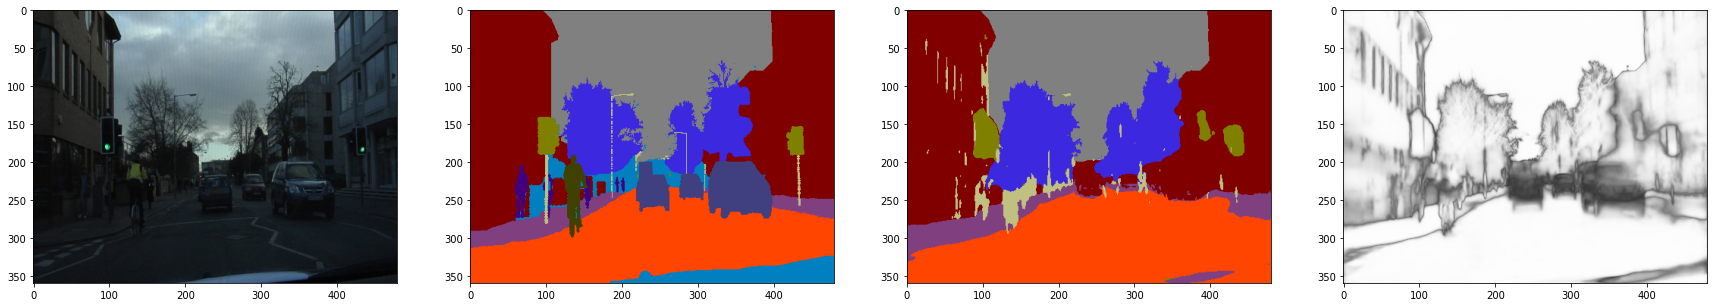

In [ ]:
img_id=0
label_to_rgb = transforms.Compose([
        LongTensorToRGBPIL(class_encoding),
        transforms.ToTensor()])
color_predictions = batch_transform(pred.cpu(), label_to_rgb)
color_batch_labels = batch_transform(batch_labels.cpu(), label_to_rgb)
image = torchvision.utils.make_grid(batch_images[img_id].cpu()).numpy()
label = torchvision.utils.make_grid(color_batch_labels[img_id]).numpy() 
predictionimg = torchvision.utils.make_grid(color_predictions[img_id]).numpy()
confidenceimg = torchvision.utils.make_grid(confidence[img_id].cpu()).numpy()

fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(30, 15))
ax1.imshow(np.transpose(image, (1, 2, 0)))
ax2.imshow(np.transpose(label, (1, 2, 0)))
ax3.imshow(np.transpose(predictionimg, (1, 2, 0)))
ax4.imshow(np.transpose(confidenceimg, (1, 2, 0)))
plt.show()

## E.2) Uncertainty evaluations with Deep Ensembles, using adversarial training

In [ ]:
# Adversarial training
def fast_gradient(x, x_grad, epsilon):
    """
    Generates an adversarial example x_adv. The pair (x_adv, y) can then used to augment the original training set, resulting in a smoothing of the prediction.
    Args :
        - x : single data point or batch
        - x_grad : gradient of x in the direction of criterion(x,y)
        - epsilon : hyperparameter
    Returns:
        - adversarial example
    """
    x_adv = x + epsilon * x_grad # x.grad stocke le gradient en x de la loss/criterion; ie la loss doit être calculée en amont et les gradients pas encore remis à zéros pour calculer x_adv
    return x_adv

def set_epsilon(k, x_grad):
    """
    Compute a suitable value for the epsilon in the fast_gradient function
    Args :
        - x_grad : gradient of x in the direction of criterion(x,y)
        - k : hyperparameter, maximum deviation in pixel intensity of x_adv relatively to x
    Returns:
        - epsilon, step for computing the adversarial example
    """
    return k / torch.max(x_grad).item()

# Ensuite : 
# - compute l_adv = criterion(x_adv, y)
# - add l_adv to the loss
# - backprop

## F. Analysis and conclusions

**\Q16 inspired by this [paper](https://arxiv.org/abs/1912.02757) propose a way to study the diversity of MC dropout and Deep Ensembles**

In [ ]:
from itertools import combinations

# Write the code.
def get_pred(outputs):
    softmax_layer = torch.nn.Softmax2d()
    outputs0 = outputs[:,0:7,:,:] # we delete the last class since we do not train on that
    outputs0_proba = softmax_layer(outputs0)
    _, pred = outputs0_proba.max(1)
    return pred

def dissimilary_pred_mc(model, x, nb=12):
    dissimilary_matrix = torch.zeros((nb, nb)).cuda()
    model.train()
    with torch.no_grad():
        outputs = [model(x) for _ in range(nb)]
        preds = list(map(get_pred, outputs))
        for i, j in combinations(list(range(nb)), 2):
            dissimilary_matrix[i, j] = torch.sum(preds[i] != preds[j]) / torch.numel(preds[0])
            dissimilary_matrix[j, i] = dissimilary_matrix[i, j]
    return dissimilary_matrix

def dissimilary_pred_ensemble(list_models, x):
    dissimilary_matrix = torch.zeros((len(list_models), len(list_models))).cuda()
    for model in list_models:
        model.eval()
    with torch.no_grad():
        outputs = [model(x) for model in list_models]
        preds = list(map(get_pred, outputs))
        for i, j in combinations(list(range(len(list_models))), 2):
            dissimilary_matrix[i, j] = torch.sum(preds[i] != preds[j]) / torch.numel(preds[0])
            dissimilary_matrix[j, i] = dissimilary_matrix[i, j]
    return dissimilary_matrix


def similarity_weights_ensemble(list_models):
    similary_matrix = torch.ones((len(list_models), len(list_models))).cuda()
    list_weights = []
    for model in list_models:
        weights = []
        for weight in model.parameters():
            weights.append(weight.view(-1).detach())
        weights = torch.cat(weights)
        list_weights.append(weights)
    for i, j in combinations(list(range(len(list_models))), 2):
        similary_matrix[i, j] = (torch.dot(list_weights[i], list_weights[j])) / (torch.norm(list_weights[i]) * (torch.norm(list_weights[j])))
        similary_matrix[j, i] = similary_matrix[i, j]
    return similary_matrix

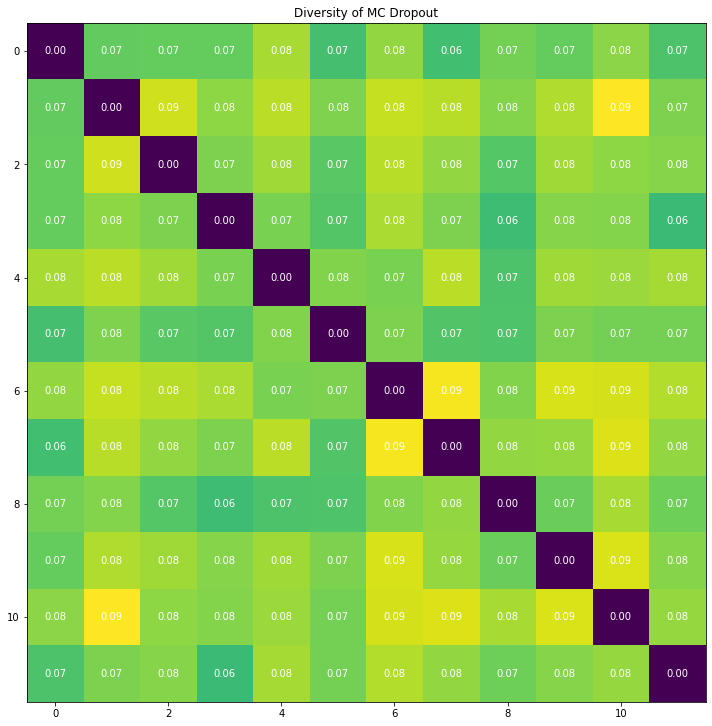

In [ ]:
dissimilary_matrix = dissimilary_pred_mc(model, batch_images)
fig, ax = plt.subplots(figsize=(10, 15))
im = ax.imshow(dissimilary_matrix.cpu().detach().numpy())

for i in range(dissimilary_matrix.size(0)):
    for j in range(dissimilary_matrix.size(1)):
        text = ax.text(j, i, "{:.2f}".format(round(float(dissimilary_matrix[i, j].cpu().detach()), 2)), ha="center", va="center", color="w")

ax.set_title("Diversity of MC Dropout")

fig.tight_layout()
plt.show()

We compute 12 different predictions using MC dropout (we use the same base trained network, but activate dropout layers during inference, 12 times). The 12 predictions are computed on the same batch of images (first batch extracted from the test set).

All pairs of predictions (a prediction consists of predicted labels on the 10 images from the batch) are compared pixel-wise in order to determine the percentage of different pixel infered labels for each possible pair.

The matrix above shows that the percentage of difference varies between 6 and 10% in our examples, which conveys the idea that using MC Dropout can usher in consequent variations in pixel predictions.

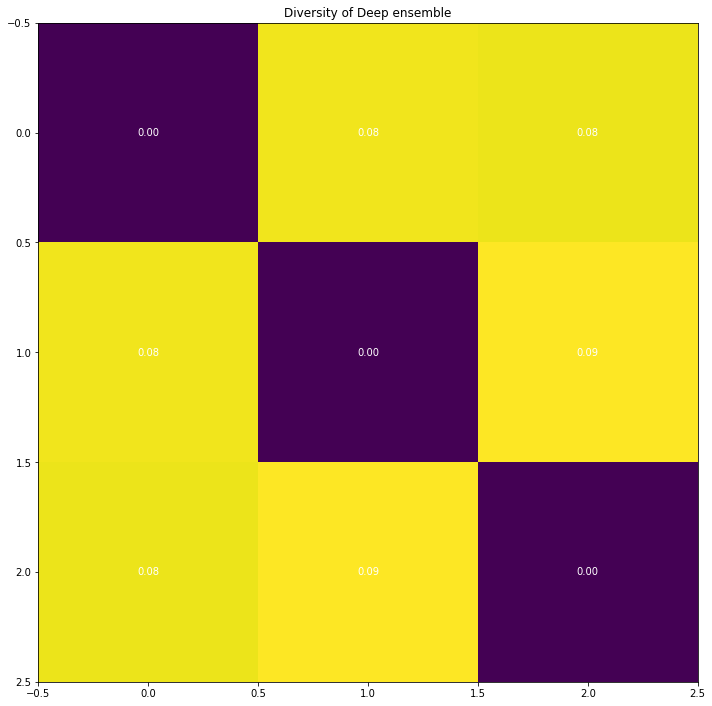

In [ ]:
list_models = [model1, model2, model3]

dissimilary_matrix = dissimilary_pred_ensemble(list_models, batch_images)
fig, ax = plt.subplots(figsize=(10, 15))
im = ax.imshow(dissimilary_matrix.cpu().detach().numpy())

for i in range(dissimilary_matrix.size(0)):
    for j in range(dissimilary_matrix.size(1)):
        text = ax.text(j, i, "{:.2f}".format(round(float(dissimilary_matrix[i, j].cpu().detach()), 2)), ha="center", va="center", color="w")

ax.set_title("Diversity of Deep ensemble")

fig.tight_layout()
plt.show()

We here study the difference between the predictions of the 3 models we used to perform Deep Ensembles, using the exact same method as above for MC Dropout.

The matrix above shows that the percentage of difference varies between 8 and 10% in our examples, which conveys the same idea that using Deep Ensembles can usher in consequent variations in pixel predictions (hence the relevance of the method).

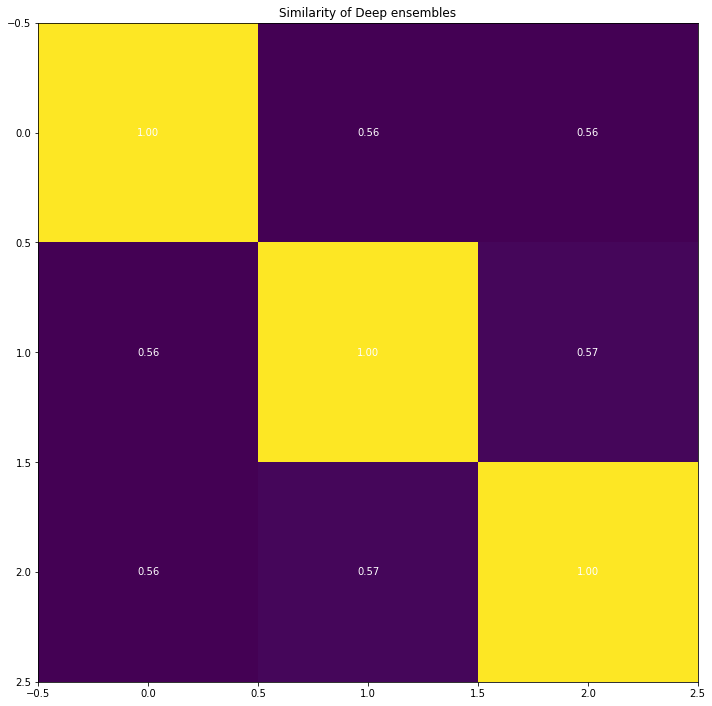

In [ ]:
list_models = [model1, model2, model3]

similary_matrix = similarity_weights_ensemble(list_models)
fig, ax = plt.subplots(figsize=(10, 15))
im = ax.imshow(similary_matrix.cpu().detach().numpy())

for i in range(similary_matrix.size(0)):
    for j in range(similary_matrix.size(1)):
        text = ax.text(j, i, "{:.2f}".format(round(float(similary_matrix[i, j].cpu().detach()), 2)), ha="center", va="center", color="w")

ax.set_title("Similarity of Deep ensembles")

fig.tight_layout()
plt.show()

Finally, this method studies the similarity between the weights of the considered neural networks for deep ensembles (we used 3 different models). The metric used to compute the similarity between weights is the cosine similarity.

What is interesting in this matrix is that from the first row only, we could infer that networks 2 and 3 are rather similar since they have the same degree of difference from network 1, but the following rows show that isn't the case. We see that the cosine similarity, for each pair of (different) networks is either 0.56 or 0.57, which indicates that all 3 networks exhibit a non negligeable degree of difference in their weights (pair by pair). 

**\Q17 Propose a last code to quantify epistemic uncertainty of a DNN**
For exemple you can use [OVNNI](https://arxiv.org/abs/2006.00954)


In [ ]:
def enet_weighing(dataloader, num_classes, c=1.02, ova_index=None):
    """Computes class weights as described in the ENet paper:

        w_class = 1 / (ln(c + p_class)),

    where c is usually 1.02 and p_class is the propensity score of that
    class:

        propensity_score = freq_class / total_pixels.

    References: https://arxiv.org/abs/1606.02147

    Keyword arguments:
    - dataloader (``data.Dataloader``): A data loader to iterate over the
    dataset.
    - num_classes (``int``): The number of classes.
    - c (``int``, optional): AN additional hyper-parameter which restricts
    the interval of values for the weights. Default: 1.02.

    """

    print(dataloader)
    class_count = 0
    total = 0
    for _, label in dataloader:
      if ova_index is not None:
          label = label == ova_index
          label = label.long()
      label = label.cpu().numpy()
      # Flatten label
      flat_label = label.flatten()
      
      # Sum up the number of pixels of each class and the total pixel
      # counts for each label
      class_count += np.bincount(flat_label, minlength=num_classes)
      total += flat_label.size

    # Compute propensity score and then the weights for each class
    propensity_score = class_count / total
    class_weights = 1 / (np.log(c + propensity_score))

    return class_weights

In [ ]:
def train( model, data_loader, optim, criterion, metric, ova_index=None, transform_outputs=None, iteration_loss=False):
    model.train()
    epoch_loss = 0.0
    metric.reset()
    for step, batch_data in enumerate(data_loader):
        # Get the inputs and labels
        inputs = batch_data[0].cuda()
        labels = batch_data[1].cuda()

        if ova_index is not None:
            labels = labels == ova_index
            labels = labels.float()
        
        # Forward propagation
        outputs = model(inputs)
        outputs = torch.squeeze(outputs, dim=1)

        # Loss computation
        loss = criterion(outputs, labels)

        # Backpropagation
        optim.zero_grad()
        loss.backward()
        optim.step()

        # Keep track of loss for current epoch
        epoch_loss += loss.item()

        # Keep track of the evaluation metric
        if transform_outputs is not None:
            metric.add(transform_outputs(outputs.detach()), labels.detach())
        else:
            metric.add(outputs.detach(), labels.detach())

        if iteration_loss:
            print("[Step: %d] Iteration loss: %.4f" % (step, loss.item()))

    return epoch_loss / len(data_loader), metric.value()

In [ ]:
def test(model, data_loader, criterion, metric, ova_index=None, transform_outputs=None, iteration_loss=False):
    model.eval()
    epoch_loss = 0.0
    metric.reset()
    for step, batch_data in enumerate(data_loader):
        # Get the inputs and labels
        inputs = batch_data[0].cuda()
        labels = batch_data[1].cuda()

        if ova_index is not None:
            labels = labels == ova_index
            labels = labels.float()

        with torch.no_grad():
            # Forward propagation
            outputs = model(inputs)
            outputs = torch.squeeze(outputs, dim=1)

            # Loss computation
            loss = criterion(outputs, labels)

        # Keep track of loss for current epoch
        epoch_loss += loss.item()

        # Keep track of evaluation the metric
        if transform_outputs is not None:
            metric.add(transform_outputs(outputs.detach()), labels.detach())
        else:
            metric.add(outputs.detach(), labels.detach())

        if iteration_loss:
            print("[Step: %d] Iteration loss: %.4f" % (step, loss.item()))

    return epoch_loss / len(data_loader), metric.value()

In [ ]:
def get_label_binary(x):
    sigmoid_layer = nn.Sigmoid()
    x = sigmoid_layer(x)
    x = x > 0.5
    return x.long()

In [ ]:
list_ova = []
for i in range(7):
    print(f'Training model {i}')
    ova = UNet(1).cuda()

    class_weights = enet_weighing(train_loader, 2, ova_index=i)
    class_weights = torch.from_numpy(class_weights).float().cuda()

    criterion = nn.BCEWithLogitsLoss(pos_weight=(class_weights[1] / class_weights[0]))
    optimizer = optim.Adam(ova.parameters(), lr=learning_rate, weight_decay=weight_decay)
    lr_updater = lr_scheduler.StepLR(optimizer, lr_decay_epochs, lr_decay)

    metric = IoU(2)

    # Start Training
    best_miou = 0
    train_loss_history = []
    val_loss_history = []
    train_miou_history = []
    val_miou_history = []
    for epoch in range( 20):
      print(">>>> [Epoch: {0:d}] Training".format(epoch))

      epoch_loss, (iou, miou) = train(ova, train_loader, optimizer, criterion, metric, i, get_label_binary) 
      lr_updater.step()
      print(">>>> [Epoch: {0:d}] Avg. loss: {1:.4f} | Mean IoU: {2:.4f}".format(epoch, epoch_loss, miou))
      train_miou=miou
      train_loss=epoch_loss
      if (epoch + 1) % 5 == 0 or epoch + 1 == 20:

        print(">>>> [Epoch: {0:d}] Validation".format(epoch))
        loss, (iou, miou) = test(ova, val_loader, criterion, metric, i, get_label_binary)
        print(">>>> [Epoch: {0:d}] Avg. loss: {1:.4f} | Mean IoU: {2:.4f}".format(epoch, loss, miou))
        train_loss_history.append(train_loss)
        val_loss_history.append(loss)
        train_miou_history.append(train_miou)
        val_miou_history.append(miou)

        if epoch + 1 == 20 or miou > best_miou:
            print('>>>> iou: ', iou)
    
    list_ova.append(ova)
    save_checkpoint(ova, i)

Training model 0


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


>>>> [Epoch: 0] Training
>>>> [Epoch: 0] Avg. loss: 0.4535 | Mean IoU: 0.7675
>>>> [Epoch: 1] Training
>>>> [Epoch: 1] Avg. loss: 0.2935 | Mean IoU: 0.8916
>>>> [Epoch: 2] Training
>>>> [Epoch: 2] Avg. loss: 0.2151 | Mean IoU: 0.9028
>>>> [Epoch: 3] Training
>>>> [Epoch: 3] Avg. loss: 0.1631 | Mean IoU: 0.9224
>>>> [Epoch: 4] Training
>>>> [Epoch: 4] Avg. loss: 0.1414 | Mean IoU: 0.9240
>>>> [Epoch: 4] Validation
>>>> [Epoch: 4] Avg. loss: 0.0787 | Mean IoU: 0.9525
>>>> iou:  [0.99060539 0.91437383]
>>>> [Epoch: 5] Training
>>>> [Epoch: 5] Avg. loss: 0.1128 | Mean IoU: 0.9331
>>>> [Epoch: 6] Training
>>>> [Epoch: 6] Avg. loss: 0.1035 | Mean IoU: 0.9349
>>>> [Epoch: 7] Training
>>>> [Epoch: 7] Avg. loss: 0.0920 | Mean IoU: 0.9371
>>>> [Epoch: 8] Training
>>>> [Epoch: 8] Avg. loss: 0.0915 | Mean IoU: 0.9335
>>>> [Epoch: 9] Training
>>>> [Epoch: 9] Avg. loss: 0.0875 | Mean IoU: 0.9357
>>>> [Epoch: 9] Validation
>>>> [Epoch: 9] Avg. loss: 0.0406 | Mean IoU: 0.9684
>>>> iou:  [0.99397292 0.

In [ ]:
def ovnni(ava, list_ova, x):
    ava.eval()
    for ova in list_ova:
        ova.eval()
    with torch.no_grad():
        # Set activation functions
        sigmoid_layer = nn.Sigmoid()
        softmax_layer = nn.Softmax2d()
        # Get outputs from All-versus-All model
        outputs_ava = softmax_layer(ava(x)[:,0:7,:,:])
        # Get ouputs from One-versus-All models
        outputs_ova = torch.zeros_like(outputs_ava).cuda()
        for i, ova in enumerate(list_ova):
            outputs_ova[:, i, :, :] = torch.squeeze(ova(x), dim=1)
        outputs_ova = sigmoid_layer(outputs_ova)
        # Combine these outputs
        outputs_ovnni = outputs_ava * outputs_ova
    return outputs_ovnni

In [ ]:
outputs0_proba = ovnni(model, list_ova, batch_images)
confidence, pred = outputs0_proba.max(1)

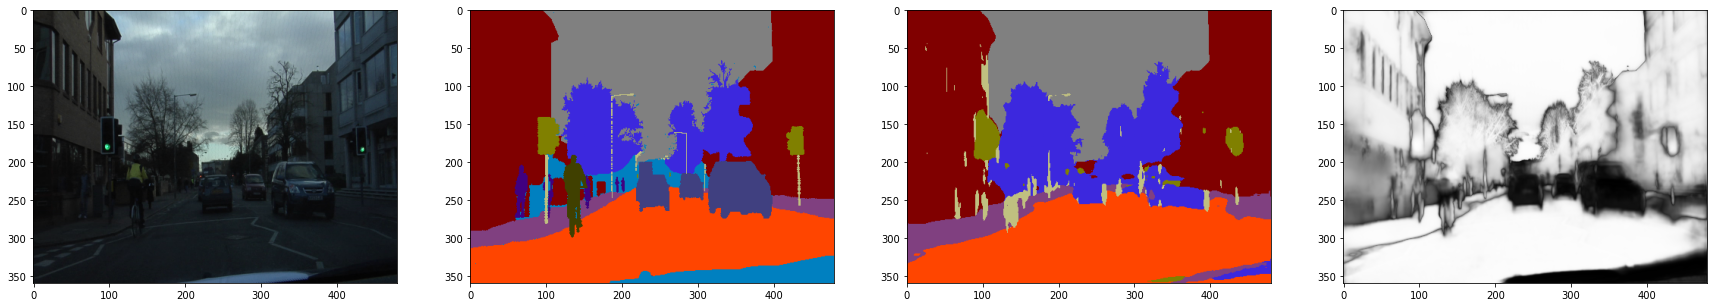

In [ ]:
img_id=0
label_to_rgb = transforms.Compose([
        LongTensorToRGBPIL(class_encoding),
        transforms.ToTensor()])
color_predictions = batch_transform(pred.cpu(), label_to_rgb)
color_batch_labels = batch_transform(batch_labels.cpu(), label_to_rgb)
image = torchvision.utils.make_grid(batch_images[img_id].cpu()).numpy()
label = torchvision.utils.make_grid(color_batch_labels[img_id]).numpy()
predictionimg = torchvision.utils.make_grid(color_predictions[img_id]).numpy()
confidenceimg = torchvision.utils.make_grid(confidence[img_id].cpu()).numpy()

fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(30, 15))
ax1.imshow(np.transpose(image, (1, 2, 0)))
ax2.imshow(np.transpose(label, (1, 2, 0)))
ax3.imshow(np.transpose(predictionimg, (1, 2, 0)))
ax4.imshow(np.transpose(confidenceimg, (1, 2, 0)))
plt.show()

**BONUS find a way to eveluate if the uncertainty is correct**

*   Entropy pour l'incertitude epistemique
<br>
Comparer l'entropy sur les pixels des classes inconnues vs l'entropy sur les classes que le réseau a vues. On s'attend à avoir une différence d'entropie qui signifie que le réseau est moins sûr de lui sur les classes inconnues (out of distribution)<br>si possible proposer un threshold en dessous duquel le réseau répond "je ne sais pas" au lieu de la classe et visualiser sur quelques images ce que ça donne (zones grisées par exemple lorsque le réseau choisit de ne pas décider) 
<br><br>
*   Accuracy vs confidence pour l'incertitude aléatoire et épistémique (non réalisé)
<br>
Comparer par bin de précision la confiance du réseau


In [ ]:
color_encoding = OrderedDict([
        ('sky', (128, 128, 128)),
        ('building', (128, 0, 0)),
        ('pole', (192, 192, 128)),
        ('road_marking', (255, 69, 0)),
        ('road', (128, 64, 128)),
        ('pavement', (60, 40, 222)),
        ('tree', (128, 128, 0)),
        ('sign_symbol', (192, 128, 128)),
        ('fence', (64, 64, 128)),
        ('car', (64, 0, 128)),
        ('pedestrian', (64, 64, 0)),
        ('bicyclist', (0, 128, 192)),
        ('unlabeled', (0, 0, 0))
    ])


In [ ]:
def entropy(t, logits = True):
    """
    calcule l'entropie par pixel dans la direction des channels sur une image
    t : (c, h, w)
    """
    if logits :
        res = num = torch.exp(t - torch.max(t, axis = 0).values)
        den = torch.sum(num, axis = 0)
        proba = num/den
    else:
        proba = t
    res = - (torch.log(proba) * proba)
    return torch.sum(res, axis = 0)

In [ ]:
def get_entropy_by_class(pred, y):
    """
    Args :
        - pred : img (c, w, h) where c = 13
        - y : labels of x
    Returns : a list of 13 values corresponding to the 13 classes with their corresponding entropy
    """
    if pred.shape[1:] != y.shape:
        raise ValueError("pred and y shapes don't match")

    ent = entropy(pred, logits=True)
    
    entropy_by_class = []

    for k in range(13):
        entropy_by_class.append(torch.masked_select(ent, y==k).cpu().detach().numpy())

    return entropy_by_class

Pour une image : 

In [ ]:
batch = next(iter(test_loader))
x, y = batch[0].cuda(), batch[1].cuda()
img = x[:1]
img_labels = y[0]

proba = model1(img)[0]
pred = entropy(proba).detach().cpu().numpy()

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Text(0.5, 1.0, 'Entropy')

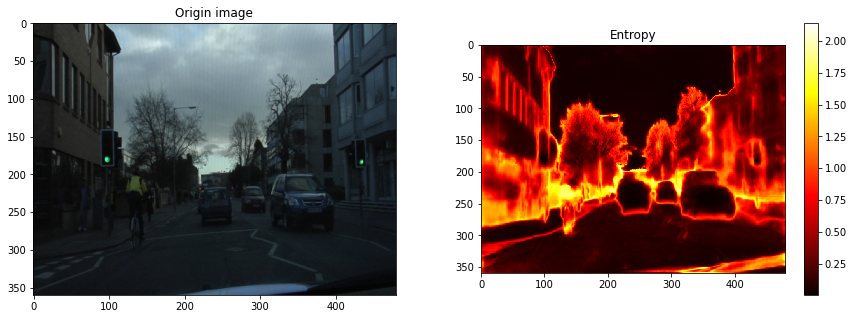

In [ ]:
fig, ax = plt.subplots(1,2)
fig.set_size_inches(15,5)


ax[0].imshow(ToPILImage()(img[0]))
z1_plot = ax[1].imshow(pred, cmap='hot', interpolation='nearest')
plt.colorbar(z1_plot,ax=ax[1])


ax[0].set_title("Origin image")
ax[1].set_title("Entropy")

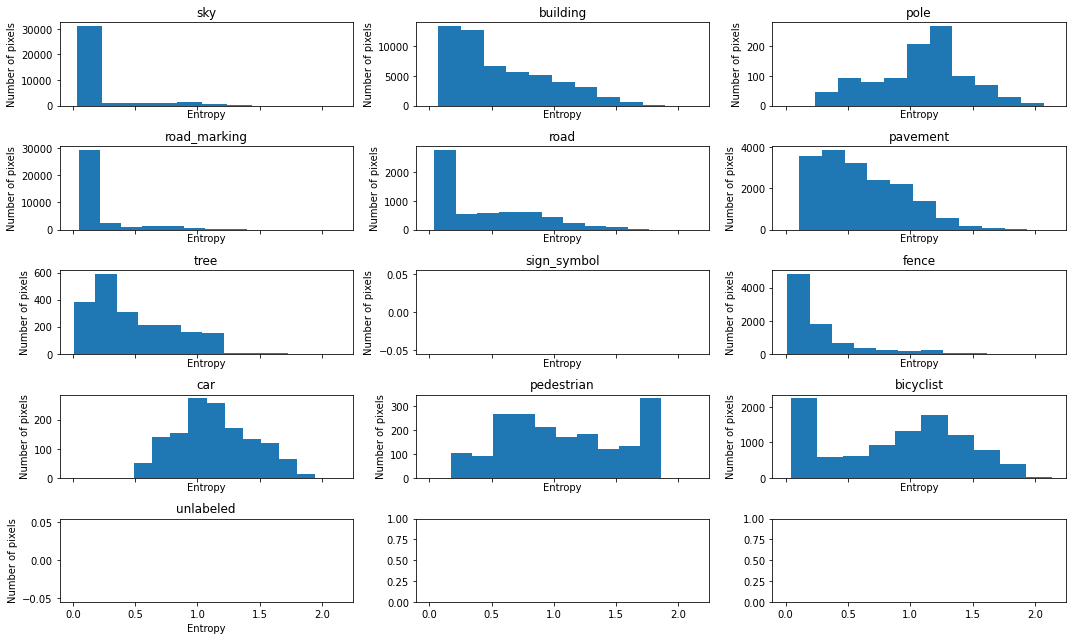

In [ ]:
fig, ax = plt.subplots(5,3, sharex=True)
fig.set_size_inches(15,9)

# entropy by class
ent_classes = get_entropy_by_class(proba, img_labels)

for k in range(13):
    ax[k//3, k%3].hist(ent_classes[k])
    ax[k//3, k%3].set_title(str(tuple(color_encoding)[k]))
    ax[k//3, k%3].set_xlabel("Entropy")
    ax[k//3, k%3].set_ylabel("Number of pixels")
plt.tight_layout()

Selon notre évaluation par l'entropie, les classes "out of distribution" ie pedestrian, car etc sont plutôt incertaines. Pour interprêter complètement les résultats, une comparaison avec le même algorithme sans retrait de classes pour l'entraînement serait pertinente. L'incertitude épistémique détectée correctement par le réseau se manifesterait par une dégradation (décalage vers les hautes valeurs) de l'entropie sur les classes concernées.

**Application**

Cacher les parties de l'image où l'algo n'est pas sûr pour plusieurs thresholds d'entropie permet de se mettre en situation.
On peut se demander si une voiture autonome serait capable de prendre des décisions "éclairées". Par exemple décider d'elle même si elle est suffisamment confiante pour aller de l'avant ou demander l'aide du conducteur humain.

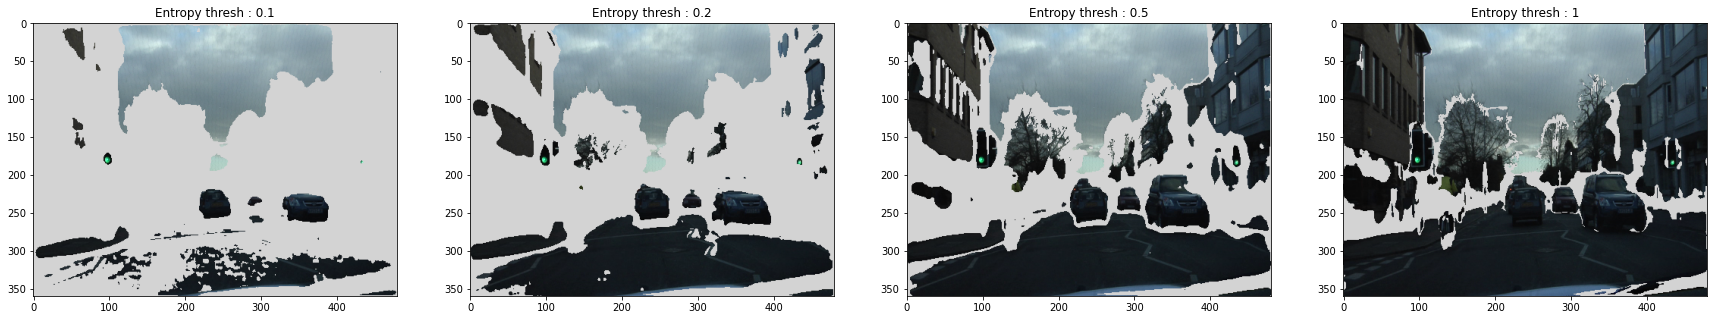

In [ ]:
lightgray = 211/255
thresholds = [0.1,0.2,0.5,1]

fig, ax = plt.subplots(1,len(thresholds))
fig.set_size_inches(30,15)

for i, t in enumerate(thresholds):
    img_modified = img[0].cpu()
    for k in range(3):
        img_modified[k] = torch.where(torch.tensor(pred)<t, img_modified[k], lightgray * torch.ones_like(img_modified[k]))
    ax[i].imshow(ToPILImage()(img_modified))
    ax[i].set_title("Entropy thresh : " + str(t))

**Write a conclusions**

Le seuil utilisé pour l'entropie dénote le niveau de sûreté que l'on souhaite fixer. Si on décide de ne considérer comme exploitable pour la navigation uniquement les zones où l'entropie est inférieure à 0.1 par exemple, on sera alors très restrictif sur la qualité exigée de l'information (en terme de niveau de confiance). 

Dans le cas où notre incertitude est bien calibrée, la 3e image voire la 2e nous permettrait déjà de naviguer dans une relative sécurité puisque l'on voit la route, les voitures et pas d'obstacle à proximité. Bien sûr à calibration identique on souhaiterait avoir un niveau d'entropie minimal. Cependant, tout l'enjeu est d'augmenter cette confiance (=diminuer l'entropie) en améliorant les performances intrinsèques de l'algorithme sans dégrader le compromis confiance rélle/confiance prédite, et non arbitrairement comme c'est le cas de la plupart des réseaux.